# Plot Average Yields for Each Core with various subsets of dataset #

Note: Plot for "All Data" Appears incorrectly in SI as a duplicated plot of the "shared smiles" plot. Correct code and plots appear here

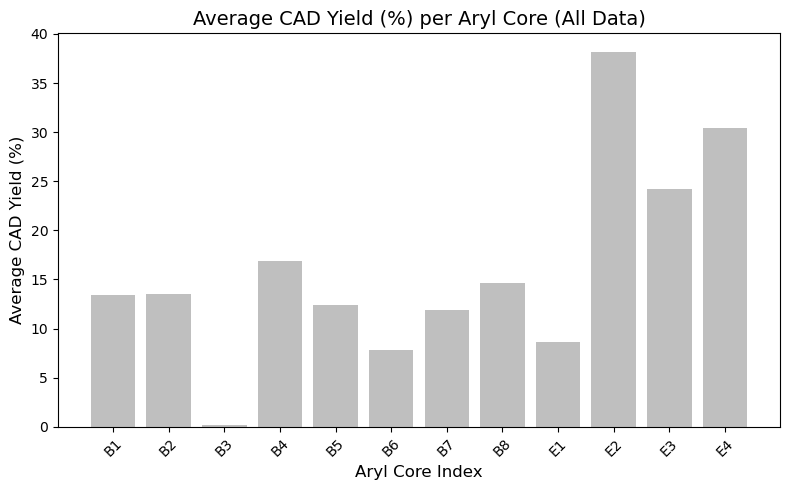

Plot saved as 'all_data_plot.png'


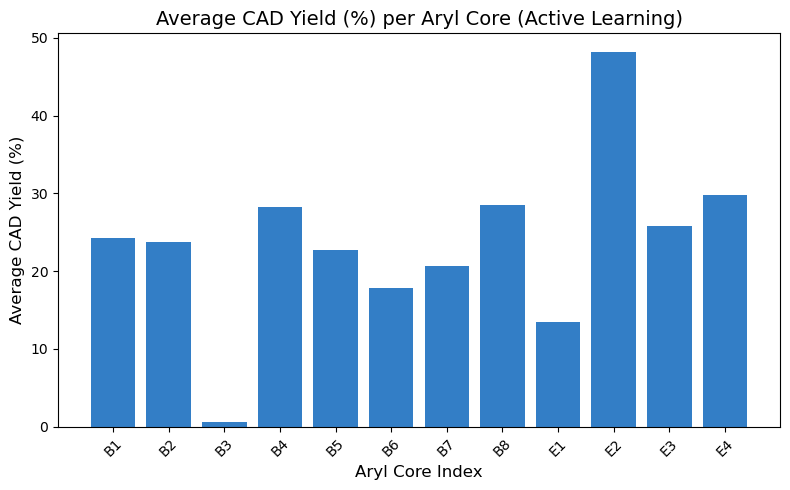

Plot saved as 'active_learning_plot.png'


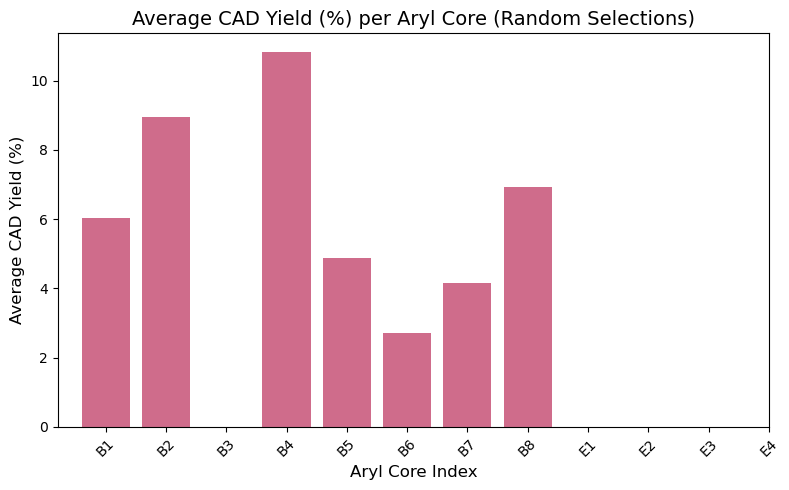

Plot saved as 'random_selections_plot.png'


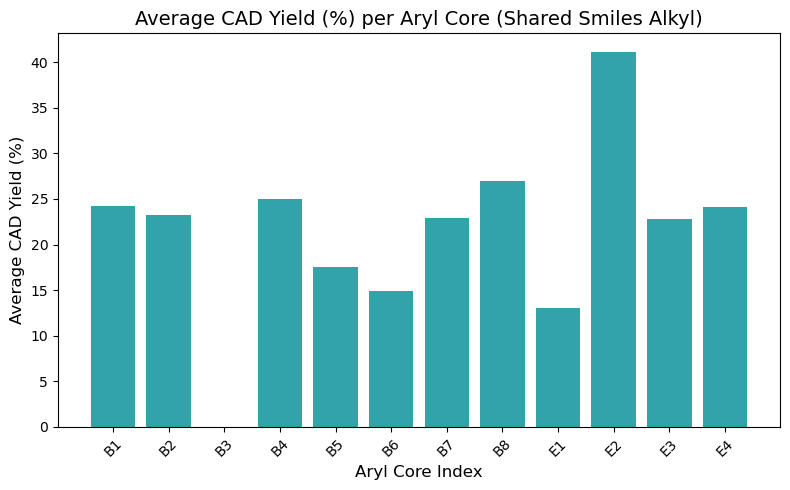

Plot saved as 'shared_smiles_alkyl_plot.png'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load experimental dataset and remove entries with missing yield values
data = pd.read_csv('experimental_results_final.csv', low_memory=False)
data = data.dropna(subset=['CAD Yield (%)']).reset_index(drop=True)

# Define ordered list of aryl core SMILES strings for plotting
aryl_cores_ordered = [
    "CC(C)(C)OC(=O)N1CCC(COc2ccc(Br)cc2)CC1",
    "CC(C)(C)OC(=O)N1CCN(c2ccc(Br)cc2Cl)CC1",
    "CCOC(=O)C(=O)CC(=O)c1ccc(Br)cc1",
    "O=S(=O)(c1ccc(Br)cc1)N1CCSCC1",
    "CS(=O)(=O)N(c1ccc(Br)cc1)S(C)(=O)=O",
    "Cc1cccc(-c2c(F)cccc2Br)c1",
    "COC(=O)c1cc(Br)ccc1OC(F)F",
    "Cc1nc(-c2ccc(Br)cc2)cs1",
    "COCc1cccc(OC)c1Br",
    "COc1cc(-n2ccnc2)ccc1Br",
    "COC(=O)Cc1cc(F)cc(Br)c1",
    "COC(=O)c1cccc(Br)c1C"
]

# Identify subset of alkyl groups shared between cores2 and non-cores2 selections
cores2 = data[data['selection'].str.contains('cores2', na=False)]
non_cores2 = data[~data['selection'].str.contains('cores2', na=False)]
shared_alkyls = set(cores2['smiles_alkyl']).intersection(set(non_cores2['smiles_alkyl']))
shared_alkyl_data = data[data['smiles_alkyl'].isin(shared_alkyls)].reset_index(drop=True)

# Function to generate and display/save average yield plots for aryl cores
def plot_and_save(df, selection_filter, omit_cross_entries, title_suffix, bar_color, output_filename):
    # Apply optional selection-based filtering
    if selection_filter:
        df = df[df['selection'].str.contains(selection_filter, na=False)].copy()
    
    # Optionally exclude entries with 'cross' in the selection column
    if omit_cross_entries:
        df = df[~df['selection'].str.contains('cross', na=False)]

    # Compute average yield for each aryl core
    mean_yield_by_core = df.groupby('smiles_aryl')['CAD Yield (%)'].mean()

    # Build ordered dataframe for consistent plotting
    ordered_yields = pd.DataFrame({
        'smiles_aryl': aryl_cores_ordered,
        'Average Yield (%)': [mean_yield_by_core.get(smiles, None) for smiles in aryl_cores_ordered]
    }).reset_index(drop=True)

    # Create custom x-axis labels (B1–B8, then E1–E4)
    x_labels = [f'B{i}' if i <= 8 else f'E{i - 8}' for i in range(1, len(ordered_yields) + 1)]

    # Plot setup
    plt.figure(figsize=(8, 5))
    positions = range(len(ordered_yields))
    plt.bar(positions, ordered_yields['Average Yield (%)'], color=bar_color, alpha=0.8)

    # Axis and title formatting
    plt.title(f'Average CAD Yield (%) per Aryl Core ({title_suffix})', fontsize=14)
    plt.xlabel('Aryl Core Index', fontsize=12)
    plt.ylabel('Average CAD Yield (%)', fontsize=12)
    plt.xticks(positions, x_labels, fontsize=10, rotation=45)
    plt.tight_layout()

    # Save and show plot
    plt.savefig(output_filename, dpi=500)
    plt.show()
    print(f"Plot saved as '{output_filename}'")

# Define color palette for each plot
plot_colors = ['#B0B0B0', '#005EB8', '#C4476E', '#008C95']

# Generate and save all figures
plot_and_save(data, None, False, "All Data", plot_colors[0], "all_data_plot.png")
plot_and_save(data, 'active_learning|initial_diverse', True, "Active Learning", plot_colors[1], "active_learning_plot.png")
plot_and_save(data, 'random', True, "Random Selections", plot_colors[2], "random_selections_plot.png")
plot_and_save(shared_alkyl_data, None, False, "Shared Smiles Alkyl", plot_colors[3], "shared_smiles_alkyl_plot.png")
